In [1]:
# Import dependencies neeeded for the project
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# The instructions for uploading the data through an API request was detailed on the data website
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.sfgov.org", None)

# First 60000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("j2j3-acqj", limit=60000)

# Convert to pandas dataframe
results_df = pd.DataFrame.from_records(results)

results_df.head()

,parcel_s,building_name,building_address,postal_code,floor_area,property_type,property_type_self_selected,pim_link,year_built,energy_audit_due_date,...,_2011_energy_star_score,_2022_reason_for_exemption,_2021_reason_for_exemption,_2020_reason_for_exemption,_2019_district_steam_use_kbtu_,_2018_district_steam_use_kbtu_,_2022_district_steam_use_kbtu_,_2021_district_steam_use_kbtu_,_2020_district_steam_use_kbtu_,_2020_energy_star_score
0,3572/001,23088-San Francisco/Treat Ave,300 Treat Ave,94110,69700,Commercial,Self-Storage Facility,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1908,2021-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0010/001,2801 Leavenworth Street,2801 LEAVENWORTH ST,94109,133675,Commercial,Office,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1907,2024-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1145/003-J,Dorraine Zief Law Library,2101 Fulton St,94117,67014,Commercial,College/University,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,NaN,2022-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0010/002,Argonaut Hotel-SV,495 JEFFERSON ST,94109,180000,Commercial,Hotel,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1907,2025-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9900/045-A,Pier 45 - Shed A,45 PIER - SHED A,94133,71455,Commercial - Port Facility,Parking,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1900,2099-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Clean up data by only keeping the specific rows we want for our data analysis
# Drop all rows with NaN or Not Available or 0
# Lump all commercial buildings into one type
clean_results_df = results_df.loc[:,['building_name', 'floor_area', 'property_type', 'property_type_self_selected','year_built', '_2022_weather_normalized_source_eui_kbtu_ft2_', 
                                    '_2022_total_ghg_emissions_intensity_kgco2e_ft2_', '_2021_weather_normalized_source_eui_kbtu_ft2_', 
                                    '_2021_total_ghg_emissions_intensity_kgco2e_ft2_', '_2020_weather_normalized_source_eui_kbtu_ft2_',
                                    '_2020_total_ghg_emissions_intensity_kgco2e_ft2_', 'a_2019_weather_normalized_source_eui_kbtu_ft2_',
                                    '_2019_total_ghg_emissions_intensity_kgco2e_ft2_', '_2018_weather_normalized_source_eui_kbtu_ft2_',
                                    '_2018_total_ghg_emissions_intensity_kgco2e_ft2_']]
results_na = clean_results_df.replace("Not Available", np.nan)
results_na = clean_results_df.replace("0", np.nan)
clean_results_df = results_na.dropna()
clean_results_df = clean_results_df.replace("Commercial - Port Facility", "Commercial")
clean_results_df


,building_name,floor_area,property_type,property_type_self_selected,year_built,_2022_weather_normalized_source_eui_kbtu_ft2_,_2022_total_ghg_emissions_intensity_kgco2e_ft2_,_2021_weather_normalized_source_eui_kbtu_ft2_,_2021_total_ghg_emissions_intensity_kgco2e_ft2_,_2020_weather_normalized_source_eui_kbtu_ft2_,_2020_total_ghg_emissions_intensity_kgco2e_ft2_,a_2019_weather_normalized_source_eui_kbtu_ft2_,_2019_total_ghg_emissions_intensity_kgco2e_ft2_,_2018_weather_normalized_source_eui_kbtu_ft2_,_2018_total_ghg_emissions_intensity_kgco2e_ft2_
0,23088-San Francisco/Treat Ave,69700,Commercial,Self-Storage Facility,1908,19.5,0.5,38.6,0.8,20.6,0.5,21,0.5,33.4,0.8
4,Pier 45 - Shed A,71455,Commercial,Parking,1900,13.4,0.3,14.9,0.3,25.6,0.6,18.6,0.5,14.2,0.4
9,211 Jefferson St,40052,Commercial,Retail Store,1953,46.4,1.1,60.3,1.3,106.8,2.8,159.8,4.4,132.5,3.8
15,2770 TAYLOR ST,40017,Commercial,Mixed Use Property,1966,164.1,5.2,150.3,4.4,99.9,3,195.6,6.4,205,6.9
17,Wharf Plaza Apartments -1855,45812,Mixed Residential,Multifamily Housing,1983,34.7,1.5,42.9,1.7,43.2,1.8,70.3,2.3,70.7,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,CA800_Avalon Mission Bay II,345686,Mixed Residential,Multifamily Housing,2006,66.5,2,68.5,1.8,71.5,1.9,86.1,2.5,89.4,2.6
2522,355 BERRY ST,296800,Mixed Residential,Multifamily Housing,2007,41.4,1.3,43.2,1.2,41.4,1.2,42.5,1.4,79,2.5
2526,325 BERRY ST,166257,Mixed Residential,Multifamily Housing,2007,68.4,2.2,74.7,2.2,75.3,2.3,74.8,2.4,77,2.3
2533,CA067_Avalon at Mission Bay I (cb93),295933,Mixed Residential,Multifamily Housing,2003,66.6,1.9,69.8,1.8,69.6,1.5,55.4,1.7,52.4,1.6


In [4]:
# Rename the columns in the data frame to make it easier to read

clean_results_df = clean_results_df.rename(columns = {'building_name':'Building Name', 'floor_area':'Floor Area', 'property_type':'Property Type', 'property_type_self_selected': 'Property Subcategory','year_built':'Year Built', 
                                   '_2022_weather_normalized_source_eui_kbtu_ft2_':'2022 Source EUI (kBtu/ft2)', '_2022_total_ghg_emissions_intensity_kgco2e_ft2_':'2022 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   '_2021_weather_normalized_source_eui_kbtu_ft2_':'2021 Source EUI (kBtu/ft2)', '_2021_total_ghg_emissions_intensity_kgco2e_ft2_':'2021 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   '_2020_weather_normalized_source_eui_kbtu_ft2_':'2020 Source EUI (kBtu/ft2)', '_2020_total_ghg_emissions_intensity_kgco2e_ft2_':'2020 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   'a_2019_weather_normalized_source_eui_kbtu_ft2_':'2019 Source EUI (kBtu/ft2)', '_2019_total_ghg_emissions_intensity_kgco2e_ft2_':'2019 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   '_2018_weather_normalized_source_eui_kbtu_ft2_':'2018 Source EUI (kBtu/ft2)', '_2018_total_ghg_emissions_intensity_kgco2e_ft2_':'2018 Total GHG Emissions Intensity (kGCO2e/ft2)'})

# Change the data type to float for all numerical entries
clean_results_df = clean_results_df.astype({'2022 Source EUI (kBtu/ft2)': 'float',
                                            '2022 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2021 Source EUI (kBtu/ft2)': 'float',
                                            '2021 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2020 Source EUI (kBtu/ft2)': 'float',
                                            '2020 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2019 Source EUI (kBtu/ft2)': 'float',
                                            '2019 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2018 Source EUI (kBtu/ft2)': 'float',
                                            '2018 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float'})



clean_results_df

,Building Name,Floor Area,Property Type,Property Subcategory,Year Built,2022 Source EUI (kBtu/ft2),2022 Total GHG Emissions Intensity (kGCO2e/ft2),2021 Source EUI (kBtu/ft2),2021 Total GHG Emissions Intensity (kGCO2e/ft2),2020 Source EUI (kBtu/ft2),2020 Total GHG Emissions Intensity (kGCO2e/ft2),2019 Source EUI (kBtu/ft2),2019 Total GHG Emissions Intensity (kGCO2e/ft2),2018 Source EUI (kBtu/ft2),2018 Total GHG Emissions Intensity (kGCO2e/ft2)
0,23088-San Francisco/Treat Ave,69700,Commercial,Self-Storage Facility,1908,19.5,0.5,38.6,0.8,20.6,0.5,21.0,0.5,33.4,0.8
4,Pier 45 - Shed A,71455,Commercial,Parking,1900,13.4,0.3,14.9,0.3,25.6,0.6,18.6,0.5,14.2,0.4
9,211 Jefferson St,40052,Commercial,Retail Store,1953,46.4,1.1,60.3,1.3,106.8,2.8,159.8,4.4,132.5,3.8
15,2770 TAYLOR ST,40017,Commercial,Mixed Use Property,1966,164.1,5.2,150.3,4.4,99.9,3.0,195.6,6.4,205.0,6.9
17,Wharf Plaza Apartments -1855,45812,Mixed Residential,Multifamily Housing,1983,34.7,1.5,42.9,1.7,43.2,1.8,70.3,2.3,70.7,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,CA800_Avalon Mission Bay II,345686,Mixed Residential,Multifamily Housing,2006,66.5,2.0,68.5,1.8,71.5,1.9,86.1,2.5,89.4,2.6
2522,355 BERRY ST,296800,Mixed Residential,Multifamily Housing,2007,41.4,1.3,43.2,1.2,41.4,1.2,42.5,1.4,79.0,2.5
2526,325 BERRY ST,166257,Mixed Residential,Multifamily Housing,2007,68.4,2.2,74.7,2.2,75.3,2.3,74.8,2.4,77.0,2.3
2533,CA067_Avalon at Mission Bay I (cb93),295933,Mixed Residential,Multifamily Housing,2003,66.6,1.9,69.8,1.8,69.6,1.5,55.4,1.7,52.4,1.6


In [5]:
# counts for each property type
property_type_counts = clean_results_df.groupby(['Property Type'])['Building Name'].count()
property_type_counts.sort_values(ascending=False)


Property Type
Commercial           604
Mixed Residential     83
Name: Building Name, dtype: int64

In [6]:
# counts for each subcategory type
property_subcategory_counts = clean_results_df.groupby(['Property Subcategory'])['Building Name'].count()
property_subcategory_counts.sort_values(ascending=False)

Property Subcategory
Office                                                   333
Multifamily Housing                                       73
Hotel                                                     47
Retail Store                                              31
Mixed Use Property                                        30
Other                                                     26
Worship Facility                                          15
Supermarket/Grocery Store                                 14
College/University                                        10
Medical Office                                             9
Non-Refrigerated Warehouse                                 7
Bank Branch                                                7
Restaurant                                                 5
Manufacturing/Industrial Plant                             5
K-12 School                                                5
Laboratory                                                 4
Str

# Is there a correlation between energy use and building floor area?

In [7]:
clean_results_df = clean_results_df.dropna()
clean_results_df

,Building Name,Floor Area,Property Type,Property Subcategory,Year Built,2022 Source EUI (kBtu/ft2),2022 Total GHG Emissions Intensity (kGCO2e/ft2),2021 Source EUI (kBtu/ft2),2021 Total GHG Emissions Intensity (kGCO2e/ft2),2020 Source EUI (kBtu/ft2),2020 Total GHG Emissions Intensity (kGCO2e/ft2),2019 Source EUI (kBtu/ft2),2019 Total GHG Emissions Intensity (kGCO2e/ft2),2018 Source EUI (kBtu/ft2),2018 Total GHG Emissions Intensity (kGCO2e/ft2)
0,23088-San Francisco/Treat Ave,69700,Commercial,Self-Storage Facility,1908,19.5,0.5,38.6,0.8,20.6,0.5,21.0,0.5,33.4,0.8
4,Pier 45 - Shed A,71455,Commercial,Parking,1900,13.4,0.3,14.9,0.3,25.6,0.6,18.6,0.5,14.2,0.4
9,211 Jefferson St,40052,Commercial,Retail Store,1953,46.4,1.1,60.3,1.3,106.8,2.8,159.8,4.4,132.5,3.8
15,2770 TAYLOR ST,40017,Commercial,Mixed Use Property,1966,164.1,5.2,150.3,4.4,99.9,3.0,195.6,6.4,205.0,6.9
17,Wharf Plaza Apartments -1855,45812,Mixed Residential,Multifamily Housing,1983,34.7,1.5,42.9,1.7,43.2,1.8,70.3,2.3,70.7,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,CA800_Avalon Mission Bay II,345686,Mixed Residential,Multifamily Housing,2006,66.5,2.0,68.5,1.8,71.5,1.9,86.1,2.5,89.4,2.6
2522,355 BERRY ST,296800,Mixed Residential,Multifamily Housing,2007,41.4,1.3,43.2,1.2,41.4,1.2,42.5,1.4,79.0,2.5
2526,325 BERRY ST,166257,Mixed Residential,Multifamily Housing,2007,68.4,2.2,74.7,2.2,75.3,2.3,74.8,2.4,77.0,2.3
2533,CA067_Avalon at Mission Bay I (cb93),295933,Mixed Residential,Multifamily Housing,2003,66.6,1.9,69.8,1.8,69.6,1.5,55.4,1.7,52.4,1.6


The correlation between commercial buildings floor area and their energy use in 2022 in SF is: 0.0878


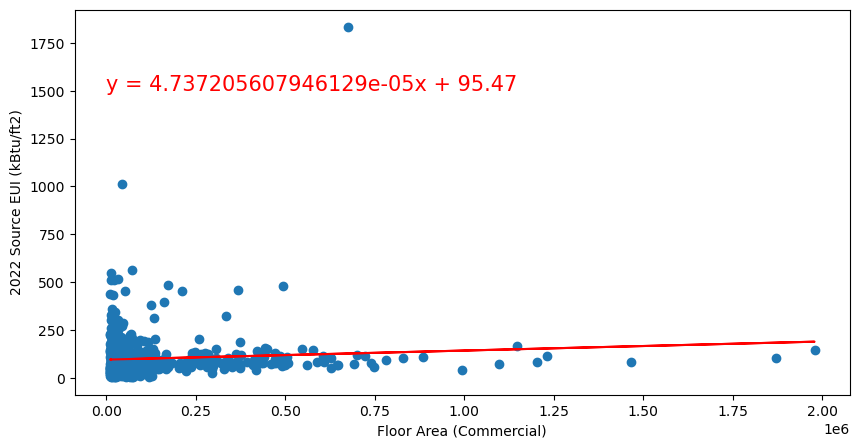

In [8]:

# Filter the DataFrame to include only 'Commercial' properties
commercial_df = clean_results_df[clean_results_df['Property Type'] == 'Commercial']

# Create a figure with a specific size
plt.figure(figsize=(10, 5))

# Create a scatter plot using the floor area and energy use columns
# Extract the floor area and energy use values as floats
flr_area_1c = commercial_df.iloc[:, 1].astype(float)
engy_use_2022c = commercial_df.iloc[:, 5].astype(float)
plt.scatter(flr_area_1c, engy_use_2022c)

# Calculate the correlation between floor area and energy use
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(flr_area_1c, engy_use_2022c)

# Calculate regression line values
regress_values = flr_area_1c * slope + intercept

plt.plot(flr_area_1c, regress_values, "r-")

# Create the equation string
equation = f"y = {slope}x + {intercept:.2f}"

# Add the equation to the plot
plt.annotate(equation, (0.00, 1500), fontsize=15, color="red")

# Calculate the correlation coefficient
correlation_1c = rvalue

# Set labels for the x-axis and y-axis
plt.xlabel('Floor Area (Commercial)')
plt.ylabel('2022 Source EUI (kBtu/ft2)')

# Print the correlation value
print(f'The correlation between commercial buildings floor area and their energy use in 2022 in SF is: {round(correlation_1c, 4)}')
# Display the plot
plt.show()




The correlation between mixed residential buildings floor area and their energy use in 2022 in SF is: -0.124


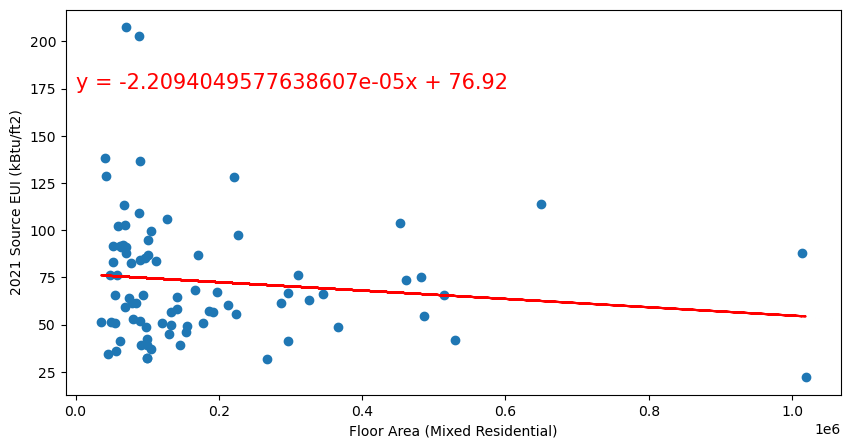

In [9]:
# Filter the DataFrame to include only 'Mixed Residential' properties
Mixed_Residential_df = clean_results_df[clean_results_df['Property Type'] == 'Mixed Residential']

plt.figure(figsize=(10, 5))

# Create a scatter plot using the floor area and energy use columns
# Extract the floor area and energy use values as floats
flr_area_1m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2022m = Mixed_Residential_df.iloc[:, 7].astype(float)
plt.scatter(flr_area_1m, engy_use_2022m)

# Calculate the correlation between floor area and energy use
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(flr_area_1m, engy_use_2022m)

# Calculate regression line values
regress_values = flr_area_1m * slope + intercept

plt.plot(flr_area_1m, regress_values, "r-")

# Create the equation string
equation = f"y = {slope}x + {intercept:.2f}"

# Add the equation to the plot
plt.annotate(equation, (0.00, 175), fontsize=15, color="red")

# Calculate the correlation coefficient
#correlation_1m = st.pearsonr(flr_area_1m, engy_use_2022m)
correlation_1m = rvalue
# Set labels for the x-axis and y-axis
plt.xlabel('Floor Area (Mixed Residential)')
plt.ylabel('2021 Source EUI (kBtu/ft2)')

# Print the correlation value
#print(f'The correlation between mixed residential buildings floor area and their energy use in 2022 in SF is: {round(correlation_1m[0], 4)}')
print(f'The correlation between mixed residential buildings floor area and their energy use in 2022 in SF is: {round(correlation_1m, 4)}')
# Display the plot
plt.show()



In [18]:
# Filter the DataFrame to include only 'Commercial' properties for the year 2018 to 2022  
commercial_df = clean_results_df[clean_results_df['Property Type'] == 'Commercial']

# Extract the floor area and energy use of Commercial Buildings for the year 2018 to 2021  
# Extract the floor area and energy use values as floats

flr_area_1c = commercial_df.iloc[:, 1].astype(float)
engy_use_2022c = commercial_df.iloc[:, 5].astype(float)

flr_area_2c = commercial_df.iloc[:, 1].astype(float)
engy_use_2021c = commercial_df.iloc[:, 7].astype(float)

flr_area_3c = commercial_df.iloc[:, 1].astype(float)
engy_use_2020c = commercial_df.iloc[:, 9].astype(float)

flr_area_4c = commercial_df.iloc[:, 1].astype(float)
engy_use_2019c = commercial_df.iloc[:, 11].astype(float)

flr_area_5c = commercial_df.iloc[:, 1].astype(float)
engy_use_2018c = commercial_df.iloc[:, 13].astype(float)

# Calculate the linregress between floor area and energy use of Commercial buildings for the year 2018 to 2022
(slope, intercept, rvalue1c, pvalue1c, stderr) = st.linregress(flr_area_1c, engy_use_2022c)
(slope, intercept, rvalue2c, pvalue2c, stderr) = st.linregress(flr_area_2c, engy_use_2021c)
(slope, intercept, rvalue3c, pvalue3c, stderr) = st.linregress(flr_area_3c, engy_use_2020c)
(slope, intercept, rvalue4c, pvalue4c, stderr) = st.linregress(flr_area_4c, engy_use_2019c)
(slope, intercept, rvalue5c, pvalue5c, stderr) = st.linregress(flr_area_5c, engy_use_2018c)

# Calculate the correlation coefficient between floor area and energy use of Commercial buildings for the year 2018 to 2021
correlation_1c = rvalue1c
correlation_2c = rvalue2c
correlation_3c = rvalue3c
correlation_4c = rvalue4c
correlation_5c = rvalue5c

# Calculate the p-value between floor area and energy use of Commercial buildings for the year 2018 to 2021
pvalue_1c = pvalue1c
pvalue_2c = pvalue2c
pvalue_3c = pvalue3c
pvalue_4c = pvalue4c
pvalue_5c = pvalue5c

0.07538885300899158

In [ ]:
# Calculate the correlation coefficient and p-value between floor area and energy use of Commercial buildings for each year
correlations_comm = [correlation_1c, correlation_2c, correlation_3c, correlation_4c, correlation_5c]
mean_correlation_comm = np.mean(correlations_comm)  # Calculate the mean correlation for commercial buildings
pvalues_comm = [pvalue_1c, pvalue_2c, pvalue_3c, pvalue_4c, pvalue_5c]
mean_pvalue_comm = np.mean(pvalues_comm)  # Calculate the mean p-value for commercial buildings

# Print the mean correlation and p-value for commercial buildings
print("Mean correlation of commercial buildings (floor area vs energy use) from 2018 to 2022 is:", mean_correlation_comm)
print("Mean p-value of commercial buildings (floor area vs energy use) from 2018 to 2022 is:", mean_pvalue_comm)

In [19]:
# Filter the DataFrame to include only 'Mixed Residential' properties
Mixed_Residential_df = clean_results_df[clean_results_df['Property Type'] == 'Mixed Residential']

# Extract the floor area and energy use of Mixed Residential Buildings  for the year 2018 to 2022  
# Extract the floor area and energy use values as floats

flr_area_1m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2022m = Mixed_Residential_df.iloc[:, 5].astype(float)

flr_area_2m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2021m = Mixed_Residential_df.iloc[:, 7].astype(float)

flr_area_3m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2020m = Mixed_Residential_df.iloc[:, 9].astype(float)

flr_area_4m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2019m = Mixed_Residential_df.iloc[:, 11].astype(float)

flr_area_5m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2018m = Mixed_Residential_df.iloc[:, 13].astype(float)

# Calculate the linregress between floor area and energy use of Mixed Residential Buildings  for the year 2018 to 2021 
(slope, intercept, rvalue1m, pvalue1m, stderr) = st.linregress(flr_area_1m, engy_use_2022m)
(slope, intercept, rvalue2m, pvalue2m, stderr) = st.linregress(flr_area_2m, engy_use_2021m)
(slope, intercept, rvalue3m, pvalue3m, stderr) = st.linregress(flr_area_3m, engy_use_2020m)
(slope, intercept, rvalue4m, pvalue4m, stderr) = st.linregress(flr_area_4m, engy_use_2019m)
(slope, intercept, rvalue5m, pvalue5m, stderr) = st.linregress(flr_area_5m, engy_use_2018m)

# Calculate the correlation coefficient between floor area and energy use of Mixed Residential Buildings  for the year 2018 to 2021
correlation_1m = rvalue1m
correlation_2m = rvalue2m
correlation_3m = rvalue3m
correlation_4m = rvalue4m
correlation_5m = rvalue5m

# Calculate the p-value between floor area and energy use of Mixed Residential Buildings  for the year 2018 to 2021  
pvalue_1m = pvalue1m
pvalue_2m = pvalue2m
pvalue_3m = pvalue3m
pvalue_4m = pvalue4m
pvalue_5m = pvalue5m


In [ ]:
# Calculate the correlation coefficient and p-value between floor area and energy use of Mixed Residential buildings for each year
correlations_mixed_Resd = [correlation_1m, correlation_2m, correlation_3m, correlation_4m, correlation_5m]
mean_correlation_mixedRsd = np.mean(correlations_mixed_Resd)  # Calculate the mean correlation for mixed residential buildings
pvalues_mixed_Resd = [pvalue_1m, pvalue_2m, pvalue_3m, pvalue_4m, pvalue_5m]
mean_pvalue_mixedRsd = np.mean(pvalues_mixed_Resd)  # Calculate the mean p-value for mixed residential buildings

# Print the mean correlation and p-value for mixed residential buildings
print("Mean correlation of mixed residential buildings (floor area vs energy use) from 2018 to 2022 is:", mean_correlation_mixedRsd)
print("Mean p-value of mixed residential buildings (floor area vs energy use) from 2018 to 2022 is:", mean_pvalue_mixedRsd)

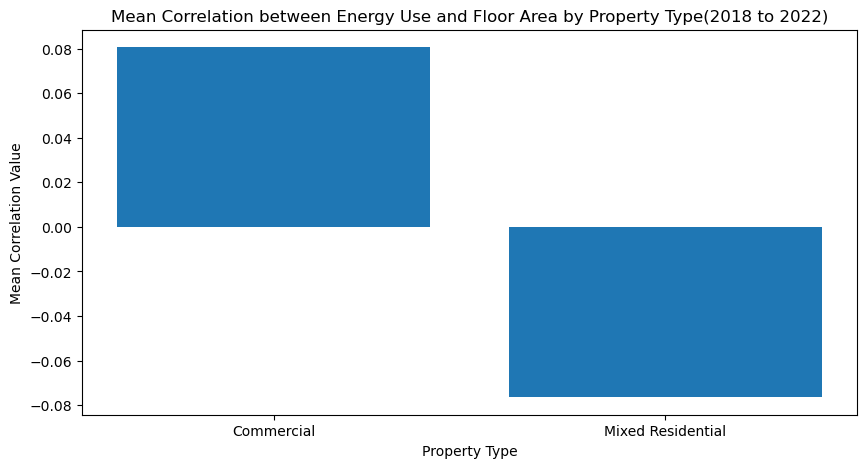

In [21]:
# Define the property types
property_types = ['Commercial', 'Mixed Residential']
plt.figure(figsize=(10,5))
# Define the mean correlation values for each property type
#correlation_values = [mean_commercial_correlation, mean_mixed_residential_correlation]
correlation_values = [mean_correlation_comm, mean_correlation_mixedRsd]
# Create a bar plot
plt.bar(property_types, correlation_values)

# Add labels and title to the plot
plt.xlabel('Property Type')
plt.ylabel('Mean Correlation Value')
plt.title('Mean Correlation between Energy Use and Floor Area by Property Type(2018 to 2022)')

# Display the plot
plt.show()




Question #1: What property subcategory type has the highest source energy use intensity and greenhouse gas emissions per square footage in the year 2022?
Need to create two bar charts
X-Axis (property subcategory), Y-Axis (Greenhouse gas emission intensity 2022)
X-Axis (property subcategory), Y-Axis (Source energy use intensity 2022)


Question # 2: For commercial buildings, check if there is a relationship between year built and greenhouse gas emission intensity, as well as year built and source energy use intensity in 2022
Need to create two line graphs
X-Axis (buckets for year built), Y-Axis (Greenhouse gas emission intensity 2022)
X-Axis (buckets for year built), Y-Axis (Source energy use intensity 2022)

Question #3: Has the greenhouse gas emission intensity for commercial and residential buildings decreased since 2018?
Need to create two line graphs
X-Axis (years, 2018-2022), Y-Axis (take average of Greenhouse gas emission intensity each year, commercial buildings)
X-Axis (years, 2018-2022), Y-Axis (take average of Greenhouse gas emission intensity each year, residential buildings)

Question #4: Is there a correlation between energy use and building floor area?
Need to create a bar graph
X-Axis (property type), Y-Axis (correlation value from correlation function between energy use and floor area)
